In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoConfig
from PIL import Image, ImageDraw, ImageFont
import gc
import shutil
import os

e:\ANACONDA\envs\SATURDAYS-2\Lib\site-packages\torch\cuda\__init__.py:749: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


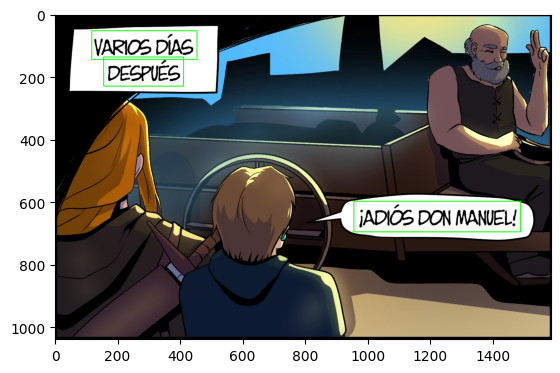

e:\ANACONDA\envs\SATURDAYS-2\Lib\site-packages\transformers\generation\utils.py:1283: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
e:\ANACONDA\envs\SATURDAYS-2\Lib\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Texto detectado por EasyOCR: VARIOS DíAS
Texto reconocido por TrOCR: VARIOS DÍAS


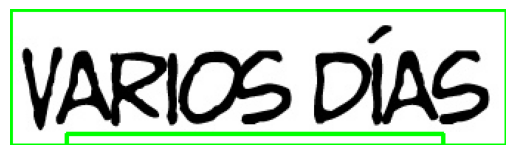

Texto detectado por EasyOCR: DESPUÉS
Texto reconocido por TrOCR: DESPUÉS


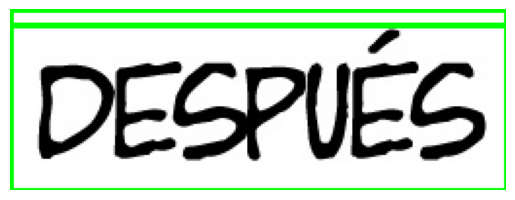

Texto detectado por EasyOCR: iADIÓS DON MANUEL!
Texto reconocido por TrOCR: ¡¡ADIOS MON MANUEL!


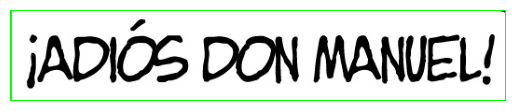

No se encontró la caché en C:\Users\Jack\.cache\huggingface\hub\models--microsoft--trocr-large-handwritten.


In [2]:
# Inicializar el procesador y el modelo de TrOCR
processor = TrOCRProcessor.from_pretrained(r'models\procesador_finetuneado_trOCR')
model = VisionEncoderDecoderModel.from_pretrained(r'models\modelo_finetuneado_trOCR')

# Inicializar el lector de EasyOCR
reader = easyocr.Reader(['es'])  # Puedes agregar otros idiomas si es necesario

# Cargar la imagen
image_path = r'data\output\divide_images_train\Capitulo 4\Comic4_001\panel_1.jpg'
image = cv2.imread(image_path)

# Detectar texto en la imagen
result = reader.readtext(image)

# Mostrar las áreas detectadas
for (bbox, text, prob) in result:
    # Extraer las coordenadas del bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    top_right = tuple(map(int, top_right))
    bottom_right = tuple(map(int, bottom_right))
    bottom_left = tuple(map(int, bottom_left))

    # Dibujar el bounding box en la imagen
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

# Mostrar la imagen con los bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Función para recortar una región de la imagen
def crop_image(image, bbox):
    top_left, top_right, bottom_right, bottom_left = bbox
    x_min = min(top_left[0], bottom_left[0])
    x_max = max(top_right[0], bottom_right[0])
    y_min = min(top_left[1], top_right[1])
    y_max = max(bottom_left[1], bottom_right[1])
    return image[y_min:y_max, x_min:x_max]

# Procesar cada región detectada con TrOCR
for (bbox, text, prob) in result:
    cropped_image = crop_image(image, bbox)
    pil_image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

    # Preprocesar la imagen
    pixel_values = processor(pil_image, return_tensors="pt").pixel_values

    # Realizar el reconocimiento de texto
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    print(f'Texto detectado por EasyOCR: {text}')
    print(f'Texto reconocido por TrOCR: {generated_text}')
    
    # Mostrar la imagen procesada con el texto reconocido
    plt.figure()
    plt.imshow(pil_image)
    plt.axis('off')
    plt.show()

    # Liberar la memoria de los modelos y procesadores
del processor
del model
del reader

# Recolectar basura para liberar memoria
gc.collect()

# Ruta donde se almacena la caché (reemplaza 'ruta_de_la_cache' con la ruta real)
cache_path = r'C:\Users\Jack\.cache\huggingface\hub\models--microsoft--trocr-large-handwritten'

# Verificar si la ruta existe y es un directorio
if os.path.exists(cache_path) and os.path.isdir(cache_path):
    # Borrar todos los archivos y subdirectorios dentro de la caché
    shutil.rmtree(cache_path)
    print(f"Caché en {cache_path} borrada correctamente.")
else:
    print(f"No se encontró la caché en {cache_path}.")